In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#removing index column and replace '??' and '###' as missing values
#df=pd.read_csv('C:/Users/Prajna/Desktop/dataset.csv',index_col=0,na_values=["??","###"])
df=pd.read_csv('C:/Users/Prajna/Desktop/dataset.csv',index_col=0)
df.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
Index,,,,,,,,,,,,,,,,,,,,,
1,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
2,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
3,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
4,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/9/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
5,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/5/1996 0:00,11/4/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [3]:
numerical_data=df.select_dtypes(exclude=[object,float])
print(numerical_data.shape)

(1781, 12)


In [4]:
#used to obtain correlation between numerical data types
correlated_data = numerical_data.corr()
correlated_data

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,Type
URL_LENGTH,1.000000,0.917986,-0.038407,-0.039839,-0.046367,-0.026446,-0.042264,-0.033779,-0.014857,-0.026686,-0.042264,0.162104
NUMBER_SPECIAL_CHARACTERS,0.917986,1.000000,-0.037459,-0.042619,-0.047103,-0.023914,-0.040096,-0.030597,-0.014376,-0.024098,-0.040096,0.280897
TCP_CONVERSATION_EXCHANGE,-0.038407,-0.037459,1.000000,0.555188,0.331080,0.457320,0.997796,0.990848,0.865580,0.458702,0.997796,-0.040202
DIST_REMOTE_TCP_PORT,-0.039839,-0.042619,0.555188,1.000000,0.210188,0.780238,0.558612,0.591188,0.313359,0.781212,0.558612,-0.082925
REMOTE_IPS,-0.046367,-0.047103,0.331080,0.210188,1.000000,0.023126,0.361104,0.304683,0.171651,0.025324,0.361104,-0.078783
APP_BYTES,-0.026446,-0.023914,0.457320,0.780238,0.023126,1.000000,0.445822,0.468999,0.074464,0.999992,0.445822,-0.011262
SOURCE_APP_PACKETS,-0.042264,-0.040096,0.997796,0.558612,0.361104,0.445822,1.000000,0.989285,0.857495,0.447448,1.000000,-0.034414
REMOTE_APP_PACKETS,-0.033779,-0.030597,0.990848,0.591188,0.304683,0.468999,0.989285,1.000000,0.880555,0.470401,0.989285,-0.032897
SOURCE_APP_BYTES,-0.014857,-0.014376,0.865580,0.313359,0.171651,0.074464,0.857495,0.880555,1.000000,0.075328,0.857495,-0.043852
REMOTE_APP_BYTES,-0.026686,-0.024098,0.458702,0.781212,0.025324,0.999992,0.447448,0.470401,0.075328,1.000000,0.447448,-0.011004


In [5]:
relevant_features=(correlated_data > 0.90)
relevant_features

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,Type
URL_LENGTH,True,True,False,False,False,False,False,False,False,False,False,False
NUMBER_SPECIAL_CHARACTERS,True,True,False,False,False,False,False,False,False,False,False,False
TCP_CONVERSATION_EXCHANGE,False,False,True,False,False,False,True,True,False,False,True,False
DIST_REMOTE_TCP_PORT,False,False,False,True,False,False,False,False,False,False,False,False
REMOTE_IPS,False,False,False,False,True,False,False,False,False,False,False,False
APP_BYTES,False,False,False,False,False,True,False,False,False,True,False,False
SOURCE_APP_PACKETS,False,False,True,False,False,False,True,True,False,False,True,False
REMOTE_APP_PACKETS,False,False,True,False,False,False,True,True,False,False,True,False
SOURCE_APP_BYTES,False,False,False,False,False,False,False,False,True,False,False,False
REMOTE_APP_BYTES,False,False,False,False,False,True,False,False,False,True,False,False


In [6]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# select needed columns 
cols = [col for col in df.columns if col  in ['URL_LENGTH','NUMBER_SPECIAL_CHARACTERS','REMOTE_APP_BYTES','APP_BYTES',
                                              'TCP_CONVERSATION_EXCHANGE','SOURCE_APP_PACKETS','REMOTE_APP_PACKETS','APP_PACKETS']]
#cols = [col for col in df.columns if col  in ['URL_LENGTH','NUMBER_SPECIAL_CHARACTERS','REMOTE_APP_BYTES']]


# dropping the 'Type' column
data = df[cols]

#assigning the Target column as target
target = df['Type']

data.head(n=2)

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,REMOTE_APP_BYTES,APP_PACKETS
Index,,,,,,,,
1,16,7,7,700,9,10,832,9
2,16,6,17,1230,17,19,1230,17


In [7]:
# create a base classifier used to evaluate a subset of attributes(RFE ALGORITHM)
model = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 3)
rfe = rfe.fit(data,target)
# summarize the selection of the attributes
#print(rfe.support_)
print(rfe.ranking_)

[3 1 1 5 2 4 6 1]


C:\Users\Prajna\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Prajna\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

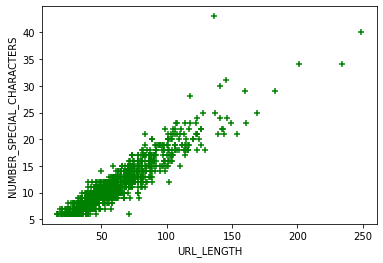

In [8]:
first  = df.loc[df['Type'] == 0]  #used to select rows whose Target value is 0
second = df.loc[df['Type'] == 1]  #used to select rows whose Target value is 1

import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel('URL_LENGTH')
plt.ylabel('NUMBER_SPECIAL_CHARACTERS')
plt.scatter(first['URL_LENGTH'], first['NUMBER_SPECIAL_CHARACTERS'],color="green",marker='+')
#plt.scatter(second['URL_LENGTH'], second['NUMBER_SPECIAL_CHARACTERS'],color="blue",marker='.')

In [9]:
#SVM
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
# Attributes that will be used by the gridsearchCV algorithm 
attr={'C': [0.1, 1, 2, 5, 10, 25, 50, 100],
      'gamma': [1e-1, 1e-2, 1e-3]
     }

#X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.4,random_state=10)
#y_test.head()
X_train, X_test, y_train, y_test = train_test_split(data, target.ravel(), test_size=0.2,random_state=10)
model = SVC(max_iter=-1)
classif = GridSearchCV(model, attr, cv=5)
classif.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 2, 5, 10, 25, 50, 100],
                         'gamma': [0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [10]:
y_pred = classif.predict(X_test)

print ('Accuracy:', accuracy_score(y_test, y_pred))
print ('Precision:', precision_score(y_test, y_pred,average='weighted'))                                   
print ('Recall:', recall_score(y_test, y_pred,average='weighted'))
print ('F1 score:', f1_score(y_test, y_pred,average='weighted'))

Accuracy: 0.9299719887955182
Precision: 0.9257728026892531
Recall: 0.9299719887955182
F1 score: 0.9239755842396898


In [11]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

#Make an instance of the Model
logisticRegr = LogisticRegression(max_iter=200)

#Training the model on the data, storing the information learned from the data
#Model is learning the relationship
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
y_pred = logisticRegr.predict(X_test)

print ('Accuracy:', accuracy_score(y_test, y_pred))
print ('Precision:', precision_score(y_test, y_pred,average='weighted'))                                   
print ('Recall:', recall_score(y_test, y_pred,average='weighted'))
print ('F1 score:', f1_score(y_test, y_pred,average='weighted'))

Accuracy: 0.8879551820728291
Precision: 0.8699307131264988
Recall: 0.8879551820728291
F1 score: 0.8702638950316969


In [13]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
#model = RandomForestClassifier(n_estimators=40)
model = RandomForestClassifier(min_samples_split=10)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [14]:
#model.score(X_test, y_test)
y_pred = model.predict(X_test)

print ('Accuracy:', accuracy_score(y_test, y_pred))
print ('Precision:', precision_score(y_test, y_pred,average='weighted'))                                   
print ('Recall:', recall_score(y_test, y_pred,average='weighted'))
print ('F1 score:', f1_score(y_test, y_pred,average='weighted'))

Accuracy: 0.9495798319327731
Precision: 0.9490594699418229
Recall: 0.9495798319327731
F1 score: 0.9456098840116598


In [15]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier 

# Creating the classifier object 
clf_gini = DecisionTreeClassifier(min_samples_split=20) 
clf_gini.fit(X_train, y_train) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [16]:
y_pred = clf_gini.predict(X_test)

print ('Accuracy:', accuracy_score(y_test, y_pred))
print ('Precision:', precision_score(y_test, y_pred,average='weighted'))                                   
print ('Recall:', recall_score(y_test, y_pred,average='weighted'))
print ('F1 score:', f1_score(y_test, y_pred,average='weighted'))

Accuracy: 0.9495798319327731
Precision: 0.9476891483488514
Recall: 0.9495798319327731
F1 score: 0.9469043251755782


In [17]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [18]:
y_pred = classifier.predict(X_test)
print ('Accuracy:', accuracy_score(y_test, y_pred))
print ('Precision:', precision_score(y_test, y_pred,average='weighted'))                                   
print ('Recall:', recall_score(y_test, y_pred,average='weighted'))
print ('F1 score:', f1_score(y_test, y_pred,average='weighted'))

Accuracy: 0.8935574229691877
Precision: 0.883306883124767
Recall: 0.8935574229691877
F1 score: 0.8865815726921683


In [19]:
#SMOTE - TO REDUCE IMBALANCE
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 

In [20]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

Before OverSampling, counts of label '1': 170
Before OverSampling, counts of label '0': 1254 

After OverSampling, the shape of train_X: (2508, 8)
After OverSampling, the shape of train_y: (2508,) 

After OverSampling, counts of label '1': 1254
After OverSampling, counts of label '0': 1254


In [21]:
#RANDOM FOREST AFTER APPLYING SMOTE
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(min_samples_split=10)
model.fit(X_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
#model.score(X_test, y_test)
y_pred = model.predict(X_train_res)

print ('Accuracy:', accuracy_score(y_train_res, y_pred))
print ('Precision:', precision_score(y_train_res, y_pred,average='weighted'))                                   
print ('Recall:', recall_score(y_train_res, y_pred,average='weighted'))
print ('F1 score:', f1_score(y_train_res, y_pred,average='weighted'))

Accuracy: 0.988835725677831
Precision: 0.9888369691296475
Recall: 0.988835725677831
F1 score: 0.9888357185782011


In [23]:
#KNN AFTER APPLYING SMOTE
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train_res, y_train_res)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [24]:
y_pred = classifier.predict(X_train_res)
print ('Accuracy:', accuracy_score(y_train_res, y_pred))
print ('Precision:', precision_score(y_train_res, y_pred,average='weighted'))                                   
print ('Recall:', recall_score(y_train_res, y_pred,average='weighted'))
print ('F1 score:', f1_score(y_train_res, y_pred,average='weighted'))

Accuracy: 0.9242424242424242
Precision: 0.9275321452740808
Recall: 0.9242424242424242
F1 score: 0.9240964108746084


In [25]:
#DECISION TREE AFTER APPLYING SMOTE
from sklearn.tree import DecisionTreeClassifier 

# Creating the classifier object 
clf_gini = DecisionTreeClassifier(min_samples_split=20) 
clf_gini.fit(X_train_res, y_train_res) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [26]:
y_pred = clf_gini.predict(X_train_res)


print ('Accuracy:', accuracy_score(y_train_res, y_pred))
print ('Precision:', precision_score(y_train_res, y_pred,average='weighted'))                                   
print ('Recall:', recall_score(y_train_res, y_pred,average='weighted'))
print ('F1 score:', f1_score(y_train_res, y_pred,average='weighted'))

Accuracy: 0.9625199362041468
Precision: 0.9625952450612495
Recall: 0.9625199362041468
F1 score: 0.9625184107368618


In [27]:
#LOGISTIC REGRESSION AFTER APPLYING SMOTE
from sklearn.linear_model import LogisticRegression

#Make an instance of the Model
logisticRegr = LogisticRegression(max_iter=200)

#Training the model on the data, storing the information learned from the data
#Model is learning the relationship
logisticRegr.fit(X_train_res, y_train_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
y_pred = logisticRegr.predict(X_train_res)

print ('Accuracy:', accuracy_score(y_train_res, y_pred))
print ('Precision:', precision_score(y_train_res, y_pred,average='weighted'))                                   
print ('Recall:', recall_score(y_train_res, y_pred,average='weighted'))
print ('F1 score:', f1_score(y_train_res, y_pred,average='weighted'))

Accuracy: 0.8038277511961722
Precision: 0.8038401172182045
Recall: 0.8038277511961722
F1 score: 0.8038257551669317


In [29]:
#SVM AFTER APPLYING SMOTE

import sklearn
from sklearn.svm import SVC

model = SVC(max_iter=-1)
classif = GridSearchCV(model, attr, cv=5)
classif.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 2, 5, 10, 25, 50, 100],
                         'gamma': [0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [30]:
y_pred = classif.predict(X_test)

print ('Accuracy:', accuracy_score(y_test, y_pred))
print ('Precision:', precision_score(y_test, y_pred,average='weighted'))                                   
print ('Recall:', recall_score(y_test, y_pred,average='weighted'))
print ('F1 score:', f1_score(y_test, y_pred,average='weighted'))

Accuracy: 0.9103641456582633
Precision: 0.9138868055365468
Recall: 0.9103641456582633
F1 score: 0.911941475619374
